#**Regressão Linear Simples**

## 🍨 Prevendo vendas de sorvetes com base na temperatura

Você vai aplicou regressão linear na prática? Nesta aula eu vou te apresentar de forma bem simples como se aplica a regressão linear utilizando python. Para nosso defafio do vídeo de hoje, vamos utilizar uma base de dados que contém dados sobre a temperatura do clima e as vendas de sorvete. Será tem alguma relação entre essas features?

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Importando a base de dados
dados = pd.read_excel("Sorvete.xlsx")
dados.head()

,Temperatura,Vendas_Sorvetes
0,26,268.125258
1,39,403.562400
2,34,339.279899
3,30,310.035329
4,27,273.616360


Que tal um gráfico para visualizar melhor esses dados de vendas em relação à temperatura? Vamos plotar um gráfico de scatter.

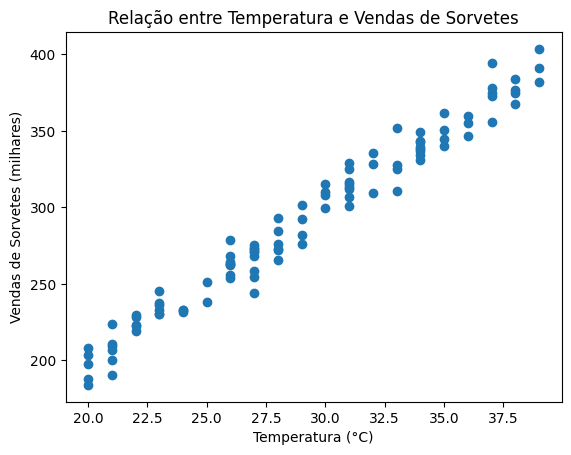

In [2]:
# Visualizando os dados
plt.scatter(dados['Temperatura'], dados['Vendas_Sorvetes'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Relação entre Temperatura e Vendas de Sorvetes')
plt.show()


Observe aqui que a relação entre as duas variáveis é linear! Como será que é a correlação entre as duas variáveis? Eu imagino que seja uma alta correlação pois a direção de crescimento entre ambas é linear.Vamos analisar!

In [3]:
dados.corr()

,Temperatura,Vendas_Sorvetes
Temperatura,1.000000,0.985589
Vendas_Sorvetes,0.985589,1.000000


Uau! 98 a correlação. Analisar a correlação entre as variáveis pode ser uma boa estratégia ao criar um modelo de regressão linear simples. A correlação **mede a força e a direção do relacionamento linear entre duas variáveis**, o que é fundamental para modelos de regressão linear.

Ao realizar uma análise de correlação, você pode identificar quais variáveis independentes (features) estão fortemente relacionadas à variável dependente (a que você deseja prever).

Se houver uma correlação significativa, isso sugere que uma relação linear pode existir e que um modelo de regressão linear pode ser apropriado.

# Criando o modelo de regressão 📈

Para criar o modelo é bem simples, vamos separar os dados em treino e teste e em seguida construir o modelo preditivo utilizando a LinearRegression do Sklearn.

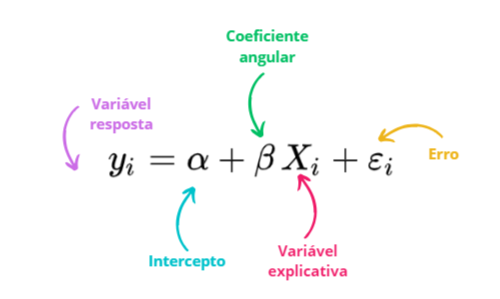

Podemos ler essa equação dizendo que Yi é igual a β vezes Xi, mais uma constante α, mais um erro εi.

O **α** nesta equação é conhecido como **o interceptor da linha da regressão (ou seja, é o valor previsto quando X=0)**.

O  **β** é conhecido como **declive da equação para X**.

A variável **X** é conhecida como a **variável preditora** (ou também independente) e **Y** é a **variável resposta** (alvo da predição).

O **ε** seria os **resíduos da regressão**, ou seja, a diferença entre os valores observados e ajustados (podemos definir também como o erro da equação).

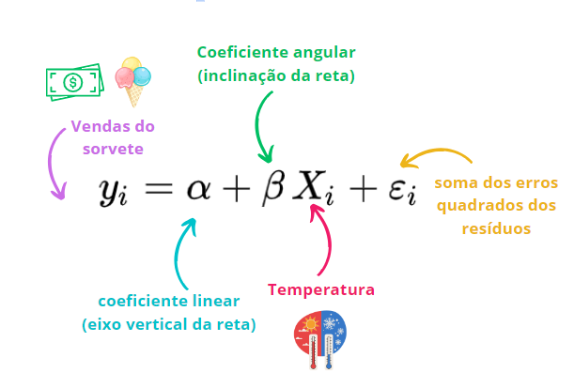

O objetivo da regressão linear é encontrar os valores de α e β que **minimizam a soma dos erros quadrados dos resíduos ε**. Os resíduos são as diferenças entre os valores observados (vendas dos sorvetes) e os valores previstos de vendas na target do modelo (alvo). Queremos aqui na equação que a reta esteja cada vez mais próxima dos valores reais.

**Mínimos Quadrados**

Como o modelo é ajustado aos dados?

Na prática, a linha de regressão é a estimativa que **minimiza a soma dos valores quadrados dos resíduos, também conhecido como a soma dos erros quadrados (residual sum of squares ou RSS)**. O método de minimizar a soma dos resíduos quadrados é chamado de regressão de mínimos quadrados, ou regressão de mínimos quadrados ordinários (ordinary least squares - OLS).


In [4]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['Temperatura']]  # Recurso (variável independente)
y = dados['Vendas_Sorvetes']  # Rótulo (variável dependente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(80, 1)

In [6]:
X_test.shape

(20, 1)

In [7]:

# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando os resultados ✅

Vamos avaliar o modelo com as seguintes métricas:

O **RMSE** é a raiz quadrada do **MSE** *(Erro Quadrático Médio - Mean Squared Error)*. o **MSE** é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O **MAE** *(Erro Médio Absoluto - Mean Absolute Error)*, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O **"R-squared (R2)"** fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

Erro Médio Quadrático: 101.64524989805876
Erro Absoluto Médio: 7.6809927436910055
R² (coeficiente de determinação): 0.9594169633031285


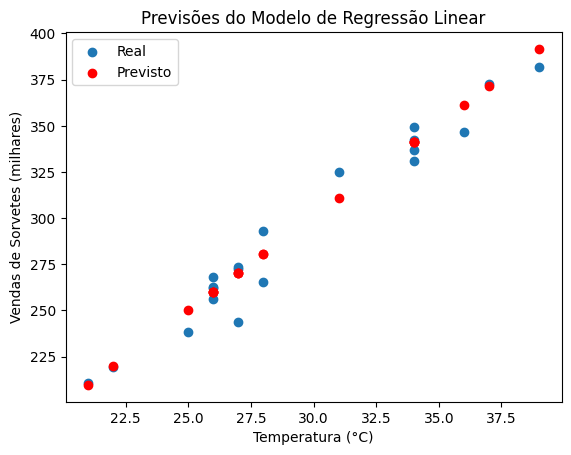

In [8]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test, previsoes)
r_quadrado = r2_score(y_test, previsoes)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

# Visualizando as previsões
plt.scatter(X_test, y_test, label='Real')
plt.scatter(X_test, previsoes, label='Previsto', color='red')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvetes (milhares)')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()
